# Best practices in explanatory Data Visualization
### _with seaborn and Matplotlib_

---

- We care: we aware of the problem: done
- We know the basic principles/best practices
- We know how to do it with the tools we already know

------

### Replicate the _Zeit Online_ Covid19 German States graph 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print("change of the code")

change of the code


### The data: New Covid19 cases per month for each german state
From: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0, after a bit of cleaning and aggregating

In [2]:
print("This is change of the code.")
print("this is the change of code, it is different from the main")

This is change of the code.
this is the change of code, it is different from the main


In [7]:
df = pd.read_csv('data/2020_03_15_RKI_Covid19_monhtly_aggregation.csv')

In [8]:
df.head()

,Bundesland,Date,Cases
0,Baden-Württemberg,2020-02,19
1,Baden-Württemberg,2020-03,12444
2,Baden-Württemberg,2020-04,13570
3,Baden-Württemberg,2020-05,2260
4,Baden-Württemberg,2020-06,810


In [9]:
df['Bundesland'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

## **Start**: standard seaborn plot

<AxesSubplot:xlabel='Date', ylabel='Cases'>

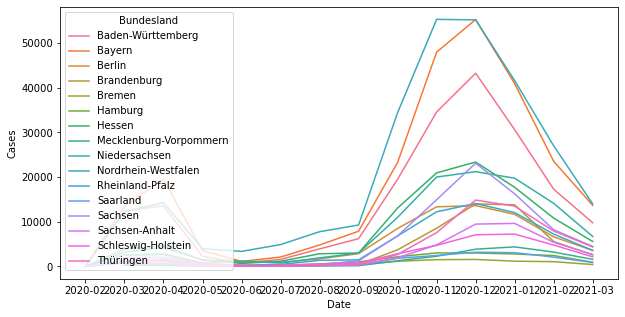

In [10]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = 'Date', y = 'Cases', hue = 'Bundesland')

## **BEST PRACTICE**: SIMPLIFY 
- 0. **Make it legible**
- 1. **Eliminate clutter**: get rid of elements that don't aid to the understanding of the message (_chart junk_)

#### Idea take out the legend
`plt.legend(bbox_to_anchor=(1.02, 1), loc=2)`

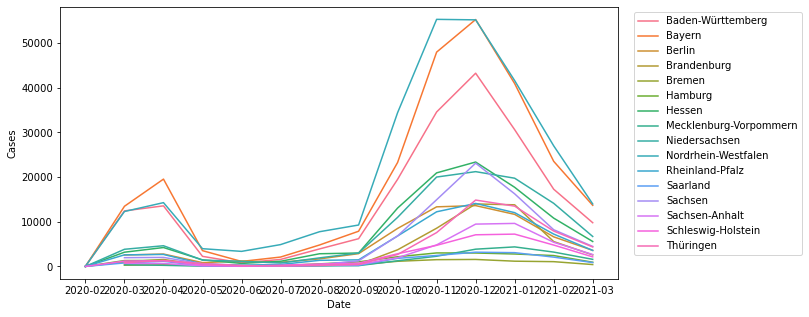

In [11]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = 'Date', y = 'Cases', hue = 'Bundesland')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

#### Better Idea: put labels directly at the lines
- check: section 'Object-Oriented Style' in 1.10 More plotting examples in the script
- https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html
- Conceptual idea: for every label you want to have (here Bundesland):
       - Get the position x and y position
       - Get the color
       - Get the name
       - Use these variables ax.annotate() or plt.text() 

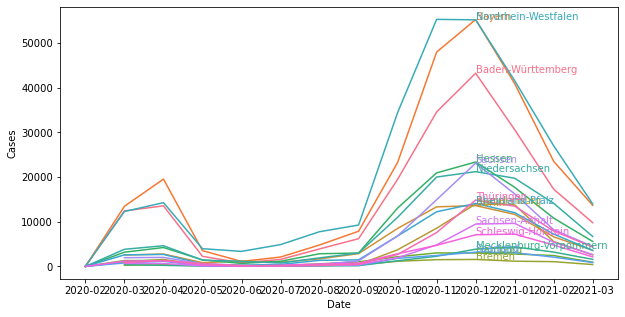

In [12]:
fig, ax = plt.subplots(figsize = (10,5))

sns.lineplot(data = df, x = 'Date', y = 'Cases', hue = 'Bundesland', legend = None)

# Add a label for each line
for line, name in zip(ax.lines, df['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

https://de.wikipedia.org/wiki/Liste_der_deutschen_Bundesl%C3%A4nder_nach_Bev%C3%B6lkerung

### --> ups, somehow the data reminds me of this xkcd comic: 
![xkcd](https://imgs.xkcd.com/comics/heatmap_2x.png)

### **Step -1**: recheck that your data matches to your message
- Here normalize the data to the state's population

In [13]:
population_df = pd.read_html('https://de.wikipedia.org/wiki/Liste_der_deutschen_Bundesl%C3%A4nder_nach_Bev%C3%B6lkerung')[0]

In [14]:
population_df.head()

,Bundesland,2020,2015,2010,2000,1990,1980,1970,1960
0,Baden-Württemberg,11.103.043,10.879.618,10.753.880,10.524.415,9.822.027,9.258.947,8.953.607,7.726.859
1,Bayern,13.140.183,12.843.514,12.538.696,12.230.255,11.448.823,10.928.151,10.561.110,9.494.939
2,Berlin[1],3.664.088,3.520.031,3.460.725,3.382.169,3.433.695,1.896.230,2.115.311,2.202.241
3,Brandenburg,2.531.071,2.484.826,2.503.273,2.601.962,2.578.312,NaN,NaN,NaN
4,Bremen,680.130,671.489,660.706,660.225,681.665,693.846,735.452,704.287


Clean up, select only most recent data, and merge

In [15]:
population_df.loc[population_df['Bundesland'] == 'Berlin[1]', 'Bundesland'] = "Berlin"
population_df = population_df[['Bundesland','2020']]

In [16]:
df = df.merge(population_df).rename(columns = {'2020':'population'})

Create normalized column (Cases for every 100 000 inhabitants)

In [17]:
df['population'] = df['population'].str.replace('.','').astype('int')
df['Cases_norm'] = round(100000*df['Cases']/df['population'])
df['Cases_norm'] = df['Cases_norm'].astype('int')

In [18]:
df.head()

,Bundesland,Date,Cases,population,Cases_norm
0,Baden-Württemberg,2020-02,19,11103043,0
1,Baden-Württemberg,2020-03,12444,11103043,112
2,Baden-Württemberg,2020-04,13570,11103043,122
3,Baden-Württemberg,2020-05,2260,11103043,20
4,Baden-Württemberg,2020-06,810,11103043,7


#### -> Back to our spaghetti chart

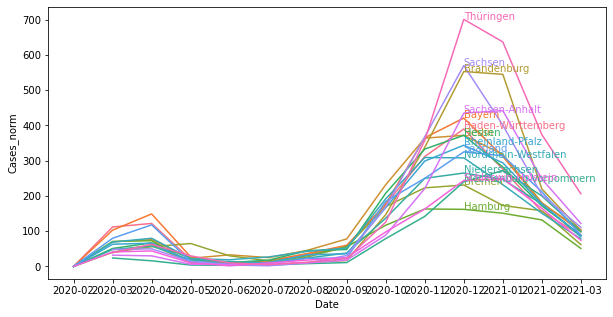

In [19]:
# Make a plot (see section 'Object-Oriented Style' in 1.10 More plotting examples)
fig, ax = plt.subplots(figsize = (10,5))

sns.lineplot(data = df, x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None)

# Add a label for each line
for line, name in zip(ax.lines, df['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

#### Make date tick labels readable
For instance by rotating them
- `plt.xticks(rotation=90)`

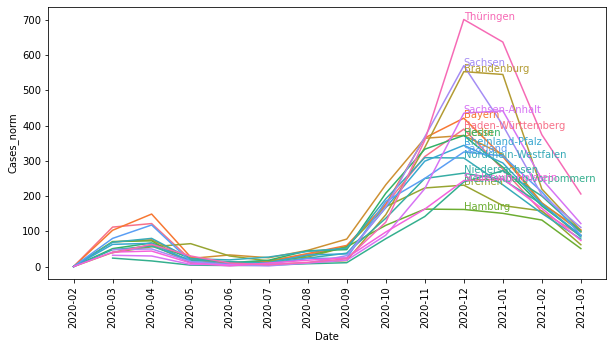

In [20]:
# Make a plot (see section 'Object-Oriented Style' in 1.10 More plotting examples)
fig, ax = plt.subplots(figsize = (10,5))

sns.lineplot(data = df, x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None)
plt.xticks(rotation=90)
# Add a label for each line
for line, name in zip(ax.lines, df['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

#### Get rid of more unnecesary elements
- Remove the enclosing square: `sns.despine()`
- Remove the date label as it's obvious: `plt.xlabel("")`

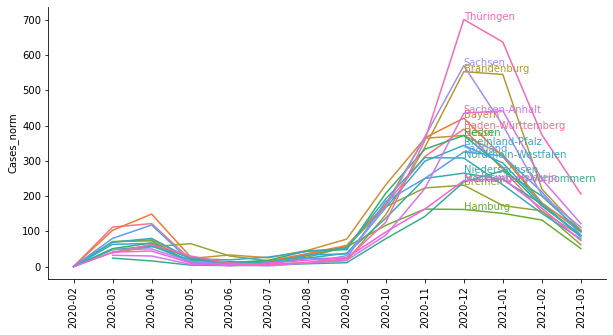

In [21]:
fig, ax = plt.subplots(figsize = (10,5))

sns.lineplot(data = df, x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None)
plt.xticks(rotation=90)
sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

## **BEST PRACTICE**: DRAW ATTENTION to your important points
Things to know:
- Which are my important points?
- What is my message?
- What do I want to show?

Things to do: 
- Emphasize your foreground data
- De-emphsize background data

#### Example 1: Goal is to see the state of your state in context

#### Separate by color
- Create another column in data frame to mark the states your interested in
- Pass that variable as `hue`
- Encode the Bundesland variable to something else, e.g. `style`

In [22]:
df['my_bundesland'] = ""
df.loc[df['Bundesland'] == "Baden-Württemberg", 'my_bundesland'] = "Baden-Württemberg"

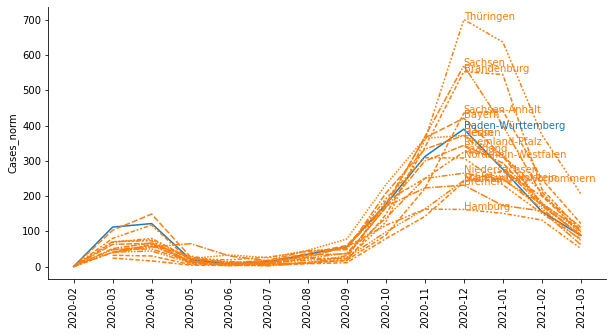

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df, x = 'Date', y = 'Cases_norm', hue = 'my_bundesland', legend = None, style = 'Bundesland')
plt.xticks(rotation=90)
sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

#### Add only labels for our states of interest
- Filter the label list with your new feature, here `df['my_bundesland'].unique()`

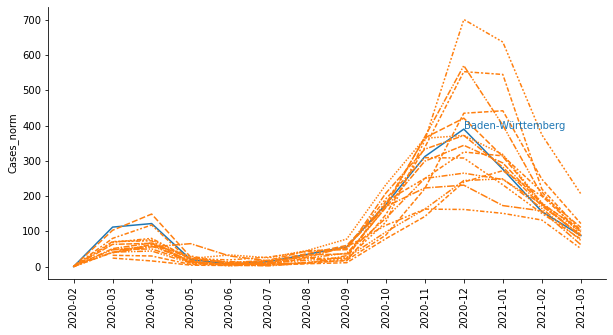

In [24]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df, x = 'Date', y = 'Cases_norm', hue = 'my_bundesland', legend = None, style = 'Bundesland')
plt.xticks(rotation=90)
sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df['my_bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

## **BEST PRACTICE**: USE COLOR WITH INTENTION
- The most important color in Data Visualization is grey!
- The standard categorical `seaborn` palettes are great
- In case you want to choose your own? [A: When is this the case?]
    - https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization
    - https://projects.susielu.com/viz-palette

#### Specify your color palette
- Add a list with colors to `sns.lineplot`, e.g.  `palette=['#1f77b4','#D3D3D3']`

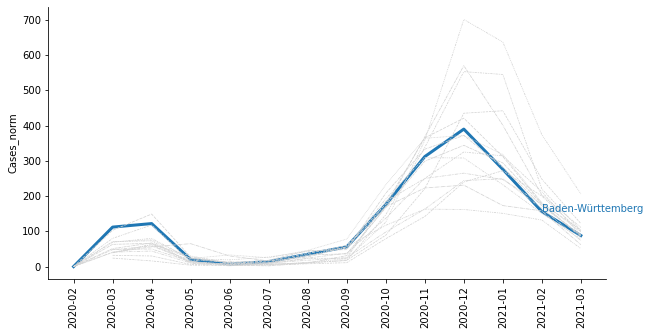

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df, x = 'Date', y = 'Cases_norm', hue = 'my_bundesland', legend = None, style = 'Bundesland',palette=['#1f77b4','#D3D3D3'], size = 'my_bundesland')
plt.xticks(rotation=90)
sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df['my_bundesland'].unique()):
    y = line.get_ydata()[-2]
    x = line.get_xdata()[-2]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

#### Example 2: Goal is to see the states with SPICED locations in context
- Create another column to mark your states of interests 
- Use that as the `hue` argument
- Adapt your color palette

In [26]:
df['spiced'] = "no"
df.loc[df['Bundesland'] == "Baden-Württemberg", 'spiced'] = "spicy"
df.loc[df['Bundesland'] == "Berlin", 'spiced'] = "spicy"
df.loc[df['Bundesland'] == "Hamburg", 'spiced'] = "spicy"
df.loc[df['Bundesland'] == "Nordrhein-Westfalen", 'spiced'] = "spicy"

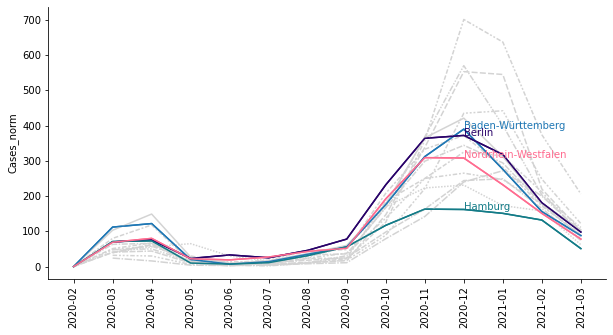

In [27]:
spiced_colors = ['#1f77b4', '#290269','#137B87','#FF6C90']


fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)
sns.lineplot(data = df[df['spiced'] == "no"], x = 'Date', y = 'Cases_norm', style = 'Bundesland', legend = None, color = '#D3D3D3')
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)

plt.xticks(rotation=90)
sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df[df['spiced'] == 'spicy']['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")

## **BEST PRACTICE**: ANNOTATE

#### Add title
- `plt.title('Covid19 infection development in German states', fontsize = 15, loc = 'left')`

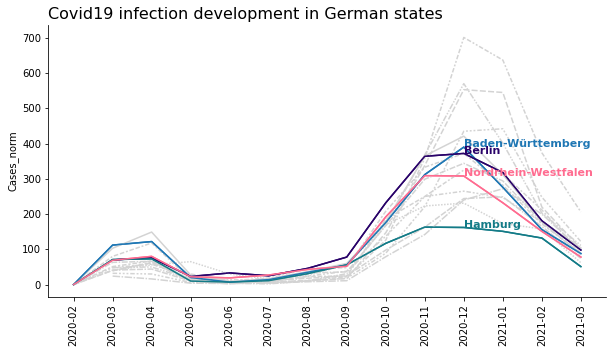

In [28]:
spiced_colors = ['#1f77b4', '#290269','#137B87','#FF6C90']

fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)
sns.lineplot(data = df[df['spiced'] == "no"], x = 'Date', y = 'Cases_norm', style = 'Bundesland', legend = None, color = '#D3D3D3')
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)

plt.xticks(rotation=90)
sns.despine()
plt.xlabel("")
plt.title('Covid19 infection development in German states', fontsize = 16, loc = 'left')

# Add a label for each line
for line, name in zip(ax.lines, df[df['spiced'] == 'spicy']['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points",
                      fontsize = 11,
                      weight='bold')


#### Make y-axis more legible

`plt.ylabel("New cases per \n 100 K ", fontsize = 10, rotation='horizontal')`
`ax.yaxis.set_label_coords(-0.07,0.99)`

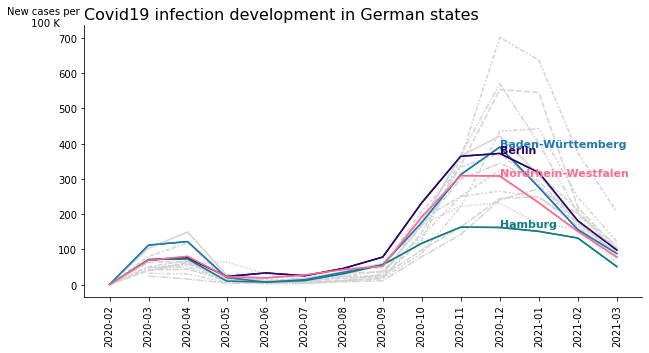

In [29]:
spiced_colors = ['#1f77b4', '#290269','#137B87','#FF6C90']


fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)
sns.lineplot(data = df[df['spiced'] == "no"], x = 'Date', y = 'Cases_norm', style = 'Bundesland', legend = None, color = '#D3D3D3')
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)

plt.title('Covid19 infection development in German states', fontsize = 16, loc = 'left')
plt.ylabel("New cases per \n 100 K ", fontsize = 10, rotation='horizontal')
ax.yaxis.set_label_coords(-0.07,0.99)

plt.xticks(rotation=90)
sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df[df['spiced'] == 'spicy']['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points",
                      fontsize = 11,
                      weight='bold')

#### Make x-axis more legible
**Idea**: Use month name and rotate

`date_names = pd.to_datetime(df['Date']).dt.strftime('%Y-%b').unique().tolist()`

`plt.xticks(rotation = 45, ticks = np.arange(0,14), labels = date_names, size = 11)`


In [30]:
date_names = pd.to_datetime(df['Date']).dt.strftime('%Y-%b').unique().tolist()

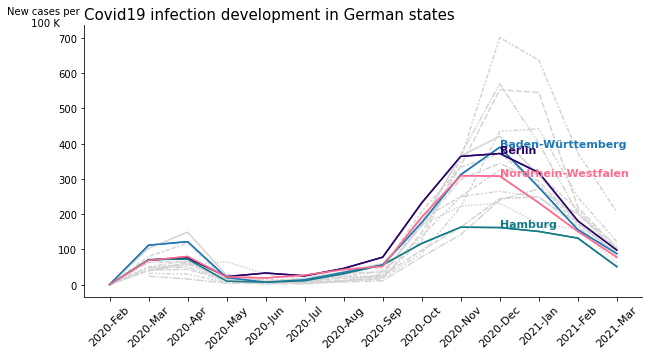

In [31]:
spiced_colors = ['#1f77b4', '#290269','#137B87','#FF6C90']


fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)
sns.lineplot(data = df[df['spiced'] == "no"], x = 'Date', y = 'Cases_norm', style = 'Bundesland', legend = None, color = '#D3D3D3')
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)

plt.title('Covid19 infection development in German states', fontsize = 15, loc = 'left')
plt.ylabel("New cases per \n 100 K ", fontsize = 10, rotation='horizontal')
ax.yaxis.set_label_coords(-0.07,0.99)

plt.xticks(rotation = 45, ticks = np.arange(0,14), labels = date_names, size = 11)
sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df[df['spiced'] == 'spicy']['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points",
                      fontsize = 11,
                      weight='bold')

**Another idea**: Reduce the frequency of ticks

`plt.xticks(ax.get_xticks()[::2], labels = date_names[::2], size = 11)`

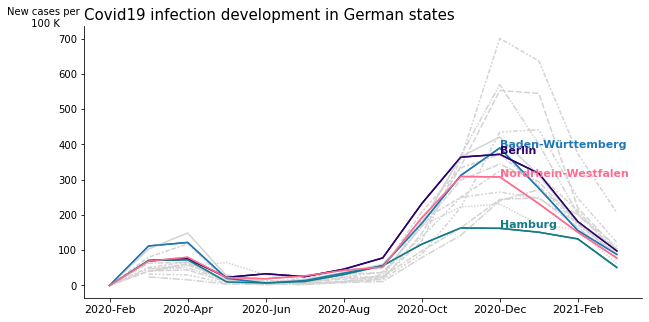

In [32]:
spiced_colors = ['#1f77b4', '#290269','#137B87','#FF6C90']


fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)
sns.lineplot(data = df[df['spiced'] == "no"], x = 'Date', y = 'Cases_norm', style = 'Bundesland', legend = None, color = '#D3D3D3')
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)

plt.title('Covid19 infection development in German states', fontsize = 15, loc = 'left')
plt.ylabel("New cases per \n 100 K ", fontsize = 10, rotation='horizontal')
ax.yaxis.set_label_coords(-0.07,0.99)

plt.xticks(ax.get_xticks()[::2], labels = date_names[::2], size = 11)


sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df[df['spiced'] == 'spicy']['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points",
                      fontsize = 11,
                      weight='bold')

#### Add more context
e.g. important thresholds
- `plt.axhline(y = 50, color = 'k', linestyle = ':', linewidth = 1)`
- `plt.text(x = '2020-11', y = 60, s = '50 cases/100K inh.', fontsize = 9)`

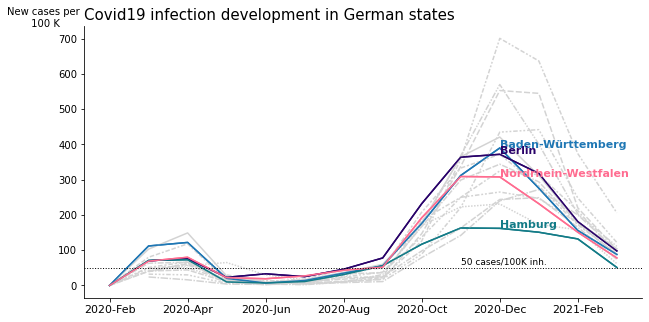

In [33]:
spiced_colors = ['#1f77b4', '#290269','#137B87','#FF6C90']

fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)
sns.lineplot(data = df[df['spiced'] == "no"], x = 'Date', y = 'Cases_norm', style = 'Bundesland', legend = None, color = '#D3D3D3')
sns.lineplot(data = df[df['spiced'] == "spicy"], x = 'Date', y = 'Cases_norm', hue = 'Bundesland', legend = None, palette = spiced_colors)

plt.title('Covid19 infection development in German states', fontsize = 15, loc = 'left')
plt.ylabel("New cases per \n 100 K ", fontsize = 10, rotation='horizontal')
ax.yaxis.set_label_coords(-0.07,0.99)

plt.xticks(ax.get_xticks()[::2], labels = date_names[::2], size = 11)


plt.axhline(y = 50, color = 'k', linestyle = ':', linewidth = 1) 
plt.text(x = '2020-11', y = 60, s = '50 cases/100K inh.', fontsize = 9)

sns.despine()
plt.xlabel("")
# Add a label for each line
for line, name in zip(ax.lines, df[df['spiced'] == 'spicy']['Bundesland'].unique()):
    y = line.get_ydata()[-4]
    x = line.get_xdata()[-4]
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points",
                      fontsize = 11,
                      weight='bold')

##### In contrast: how we started

<AxesSubplot:xlabel='Date', ylabel='Cases'>

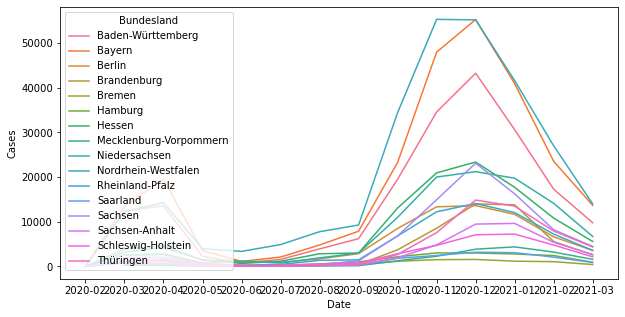

In [34]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = 'Date', y = 'Cases', hue = 'Bundesland')

----

### BONUS **BEST PRACTICE**: Choose the right chart
- What do you want to show?
- What is your message?
- (Who is your audience?)

https://www.data-to-viz.com/

#### Example, we actually want to see ALL states in context?
--> small multiples
https://seaborn.pydata.org/examples/timeseries_facets.html

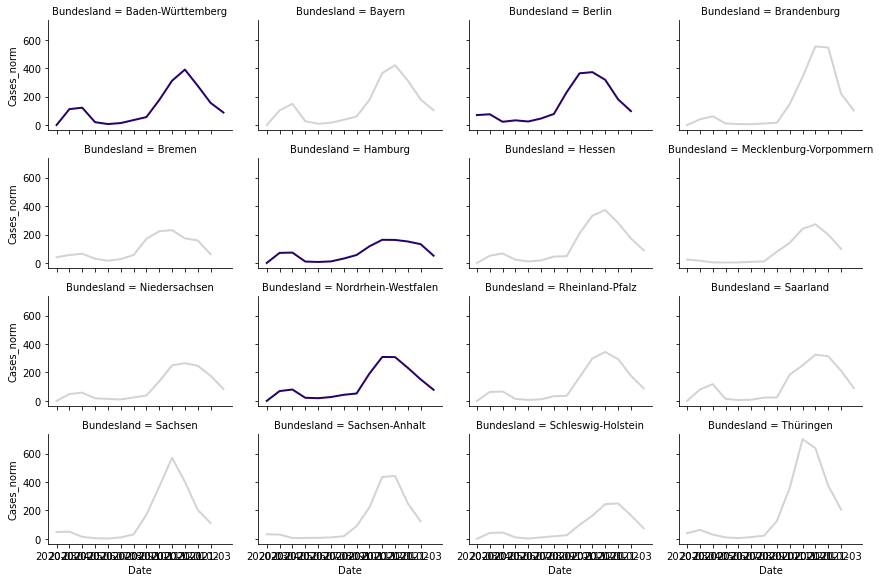

In [36]:
spiced_colors = ['#290269', '#D3D3D3']

g = sns.relplot(
    data=df,
    x="Date", y="Cases_norm", col="Bundesland",hue = 'spiced',
    kind="line", linewidth=2, palette = spiced_colors,
    col_wrap=4, height=2, aspect=1.5, legend=False,
)
